<a href="https://colab.research.google.com/github/alexbernal0/Data1/blob/main/OBQ_TradestationPerf_to_QuantStats_Report_Master_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install QuantStats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 856.3 kB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import quantstats as qs

In [ ]:
import warnings
# Suppress Matplotlib warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")


In [ ]:



# URL to the Excel file
url = "https://github.com/alexbernal0/Data1/raw/main/ORBO_Range_Tgt_LO_11.9.xlsx"

# Read the 'Trades List' tab into a DataFrame
df = pd.read_excel(url, sheet_name='Trades List', header=0)

# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df = df[['#', 'Type', 'Date/Time', 'Profit/Loss']]

#Add a new column called 'Exit Date/Time' with the same data as 'Date/Time'
df['Exit Date/Time'] = df['Date/Time']

# Shift the contents of the 'Exit Date/Time' column up one row
df['Exit Date/Time'] = df['Exit Date/Time'].shift(-1)

# Shift the contents of the 'Profit/Loss' column up one row
df['Profit/Loss'] = df['Profit/Loss'].shift(-1)

# Drop all rows where there is a NaN in the '#' column
df = df.dropna(subset=['#'])

# Convert the date column to a pandas datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date', inplace=True)

# Convert the 'Profit/Loss' and 'equity' columns to numeric data type
df['Profit/Loss'] = pd.to_numeric(df['Profit/Loss'], errors='coerce')

df['CumPL'] = 50000 + df['Profit/Loss'].cumsum()

# Convert the 'Profit/Loss' and 'equity' columns to numeric data type
df['Profit/Loss'] = pd.to_numeric(df['Profit/Loss'], errors='coerce')
df['CumPL'] = pd.to_numeric(df['CumPL'], errors='coerce')

#Create a new column called 'returnPerc'
df['returnPerc'] = df['CumPL'].pct_change()
# Set the first value of 'returnPerc' to 0
df.at[df.index[0], 'returnPerc'] = -0.002

# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df = df[['Date/Time', 'returnPerc']]

# Convert the date/time column to a pandas datetime object
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Rename the date/time column to just 'date'
df = df.rename(columns={'Date/Time': 'Date'})

# Set the date column as the index
df.set_index('Date', inplace=True)

df.index = pd.to_datetime(df.index, utc=True).tz_localize(None)

df.head()

,returnPerc
Date,
2018-11-13 10:04:00,-0.002000
2018-11-15 10:26:00,0.015781
2018-11-15 10:26:00,0.031072
2018-11-15 10:26:00,0.044567
2018-11-16 09:34:00,0.011885


[Performance Metrics]



                           Strategy
-------------------------  ----------
Start Period               2018-11-13
End Period                 2023-11-03
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          904.11%
CAGR﹪                     37.73%

Sharpe                     1.79
Prob. Sharpe Ratio         100.0%
Smart Sharpe               1.38
Sortino                    2.4
Smart Sortino              1.85
Sortino/√2                 1.69
Smart Sortino/√2           1.31
Omega                      1.37

Max Drawdown               -32.88%
Longest DD Days            294
Volatility (ann.)          24.73%
Calmar                     1.15
Skew                       -0.88
Kurtosis                   6.41

Expected Daily %           0.16%
Expected Monthly %         3.85%
Expected Yearly %          46.88%
Kelly Criterion            19.77%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.39%
Expected Shortfall (cVaR)  -2.39%

Max Consecutive Wins   

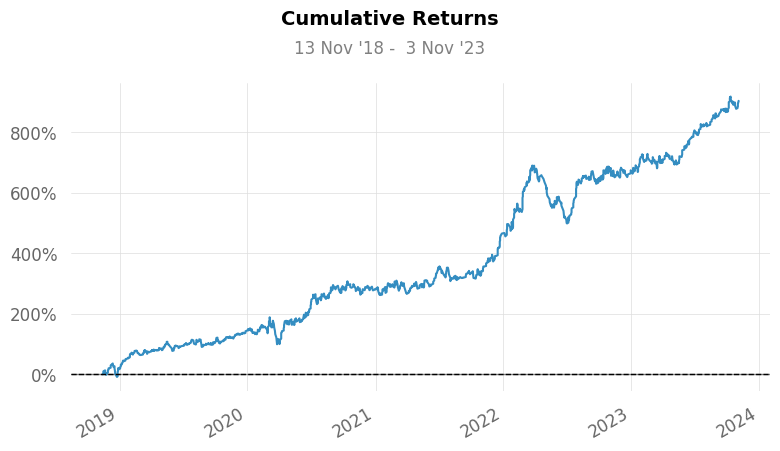

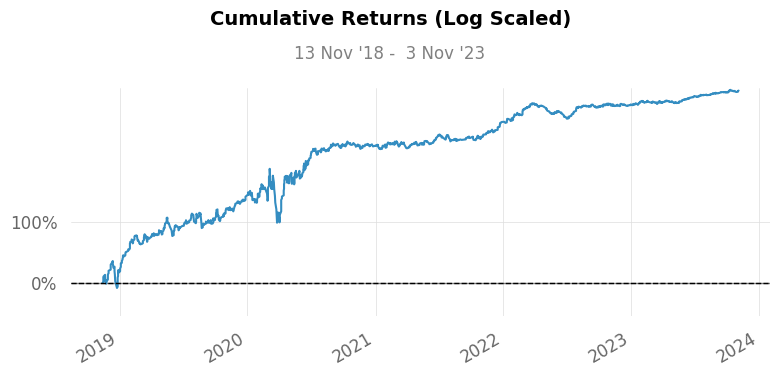

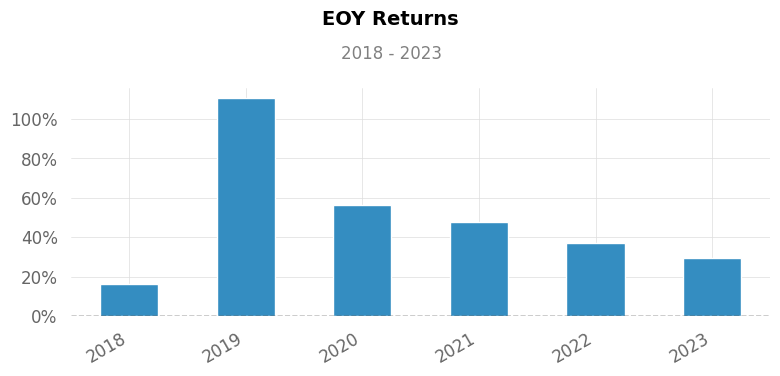

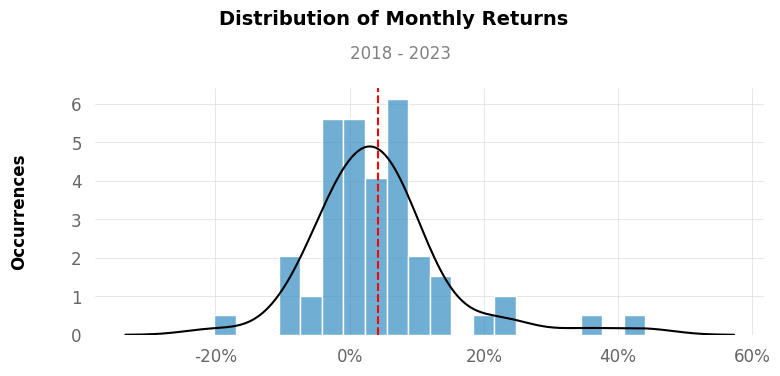

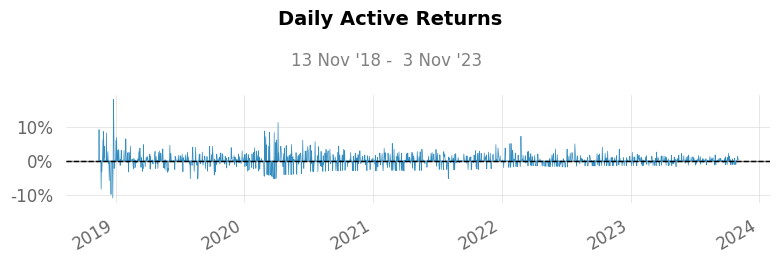

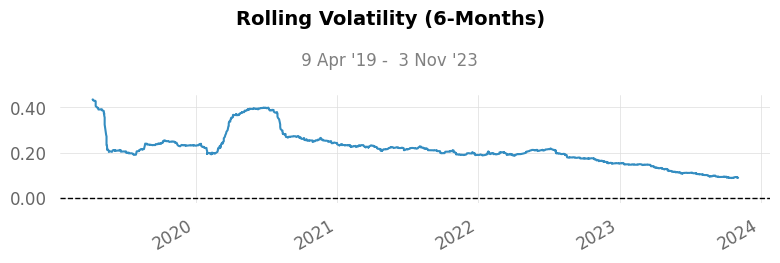

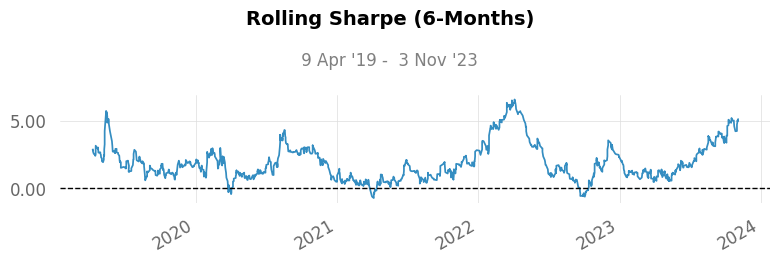

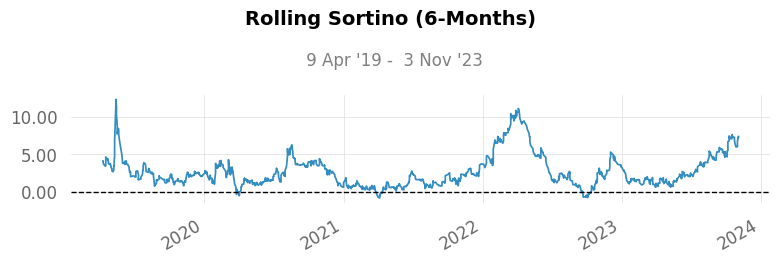

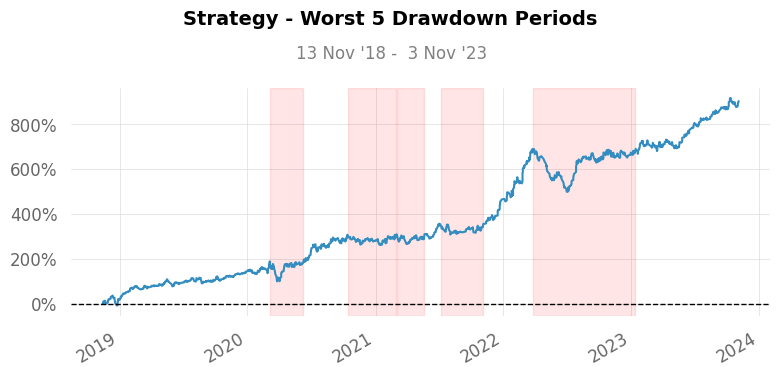

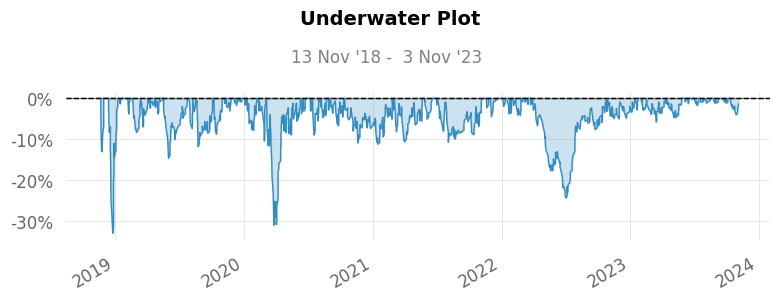

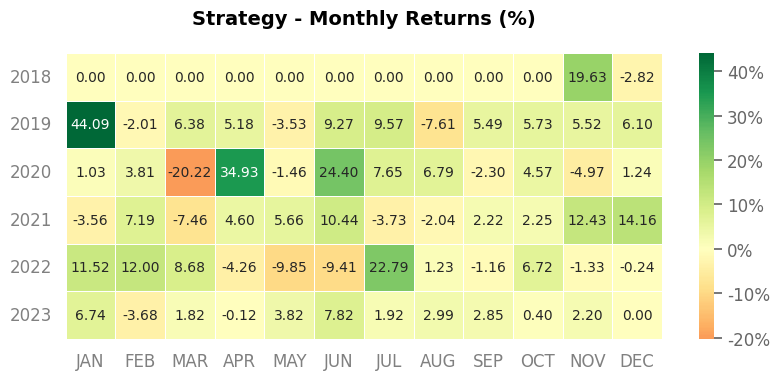

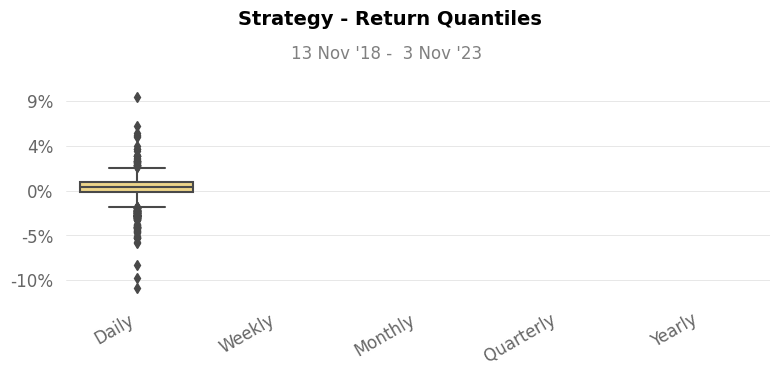

In [ ]:
#Convert dataframe to a series
series = pd.Series(df.returnPerc, index=df.index)
# reset the index to ensure each row has a unique index
df = df.reset_index()

#calc the quantstats report
qs.extend_pandas()
qs.reports.full(series)